<a href="https://colab.research.google.com/github/smatpie/HousePricePrediction/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Before running anything import your Kaggle API key
This can be done by going to kaggle > settings and then create new key

In [59]:
# Install Kaggle API
!pip install kaggle

# Create a Kaggle folder
!mkdir -p ~/.kaggle

# Move kaggle.json to the Kaggle folder
!cp kaggle.json ~/.kaggle/

# Change permissions of the file
!chmod 600 ~/.kaggle/kaggle.json


# Import Libraries

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import kagglehub
import matplotlib.pyplot as plt
import joblib

# Download the dataset
You can change the dataset if you like but you will also have to change the training set features to match it

In [62]:
path = kagglehub.dataset_download("muhammadbinimran/housing-price-prediction-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/muhammadbinimran/housing-price-prediction-data/versions/1


# Prepare the dataset, removing empty values in dataset
if the path of your downloaded dataset is not same as the one below then(since this was for colab) you can go ahead and copy the path printed above

In [63]:
data = pd.read_csv("/root/.cache/kagglehub/datasets/muhammadbinimran/housing-price-prediction-data/versions/1/housing_price_dataset.csv")
print(data.head())
data = data.dropna()

   SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065


# Training the Model
Since I had a string feautre I used one-hot-encoder to convert it
You can try LabelEncoder If you wish but it didn't work out for me

In [68]:
one_hot_encoded = pd.get_dummies(data['Neighborhood'])
one_hot_encoded=one_hot_encoded.astype(int)
data = pd.concat([data, one_hot_encoded], axis=1)
y = data['Price']
X = data.drop(columns='Price')
X = data.drop(columns='Neighborhood')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Labels Shape: {y_test.shape}")

Training Features Shape: (40000, 14)
Testing Features Shape: (10000, 14)
Training Labels Shape: (40000,)
Testing Labels Shape: (10000,)


In [69]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Testing the Model
The closer the value of your r2 to 1 the better the value, also mae and mse should be very small values

In [70]:
y_pred = model.predict(X_test)

In [71]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 7.728075825638167
Mean Squared Error (MSE): 1523.8680777938087
R^2 Score: 0.9999997345155994


# Visualizing the results
if your model turned out to be good it should give a graph of x=y

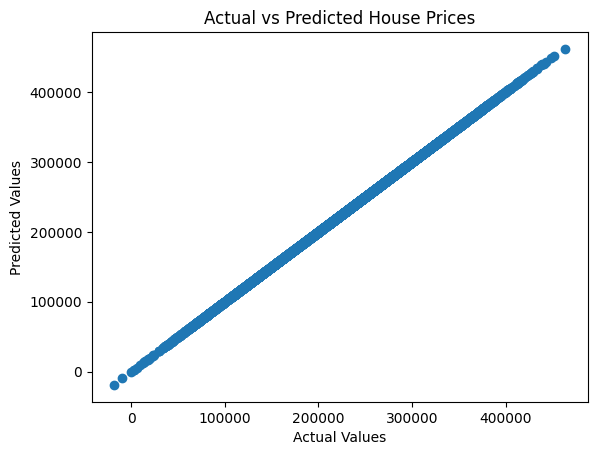

In [72]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Prices")
plt.show()


# Download your Model if you wish to
it will be saved to your file in colab(if on colab) after running the below cell, you should be able to download it

In [76]:
# Save the trained model to a file
joblib.dump(model, 'house_price_model.pkl')


['house_price_model.pkl']